In [1]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline as backend_inline

backend_inline.set_matplotlib_formats("svg")


#### Pytorch device specific configuration ###
# # Pytorch Gpu Configuration for Cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Pytorch Gpu Configuration for directml(AMD GPU)
# import torch_directml

# device = torch_directml.device()

# Set default device
torch.set_default_device(device)

In [2]:
####Create a conv2transpose class instance with parameters
# Parameters
inChans = 3
outChans = 15
krnSize = 5
stride = 1
padding = 0

# Create a Conv2Transpose instance
c = nn.ConvTranspose2d(inChans, outChans, krnSize, stride, padding)

# Let's have a look at the instance
print(c)
print(" ")

# check out its weight tensor; what are the dimensions?
print("Size of weights: " + str(c.weight.shape))
print("Size of bias: " + str(c.bias.shape))

ConvTranspose2d(3, 15, kernel_size=(5, 5), stride=(1, 1))
 
Size of weights: torch.Size([3, 15, 5, 5])
Size of bias: torch.Size([15])


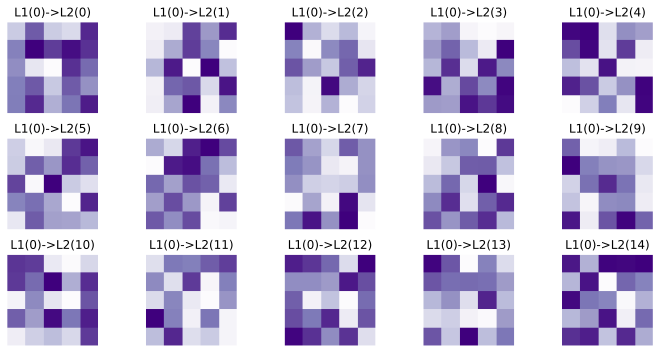

In [3]:
# What do these kernels look like?

fig, axs = plt.subplots(3, 5, figsize=(10, 5))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(torch.squeeze(c.weight[0, i, :, :]).detach(), cmap="Purples")
    ax.set_title("L1(0)->L2(%s)" % i)
    ax.axis("off")

plt.tight_layout()
plt.show()

torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


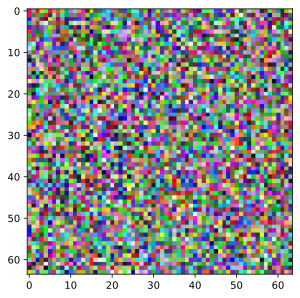

In [4]:
# size of the image (N, RGB, width, height)
imsize = (1, 3, 64, 64)

img = torch.rand(imsize)

# pytorch wants channels first, but matplotlib wants channels last.
# therefore, tensors must be permuted to visualize
img2view = img.permute(2, 3, 1, 0).numpy()
print(img.shape)
print(img2view.shape)

plt.imshow(np.squeeze(img2view))

In [5]:
# convolve the image with the filter bank (set of 'outChans' kernels)
convRes = c(img)

print(img.shape)
print(convRes.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 68, 68])
